In [1]:
import numpy as np
import matplotlib.pyplot as plt


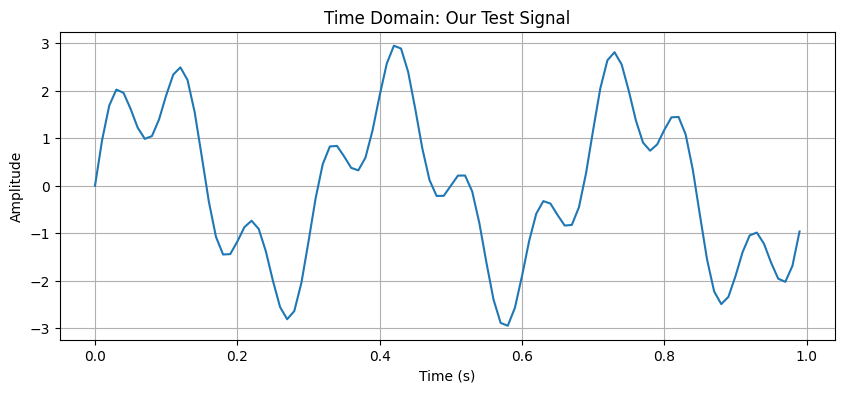

In [7]:
# --- 信号参数 ---
sampling_rate = 100  # 采样率：每秒采样100个点
duration = 1         # 信号持续时间：1秒
N = int(sampling_rate * duration) # 总样本点数 N = 100

# 创建时间轴，从0到1秒，不包含1秒本身
t = np.linspace(0, duration, N, endpoint=False)

# --- 信号“配方” ---
# 成分一：频率为 3 Hz, 振幅为 2
freq1 = 3
amp1 = 2
# 成分二：频率为 10 Hz, 振幅为 1
freq2 = 10
amp2 = 1

# 合成信号
signal = amp1 * np.sin(2 * np.pi * freq1 * t) + amp2 * np.sin(2 * np.pi * freq2 * t)

# 我们可以先画出来看看这个时域信号长什么样
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title("Time Domain: Our Test Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [4]:
def simple_dft(x):
    """
    一个简单、清晰的离散傅里叶变换实现。
    完全按照数学公式编写，用于教学目的。

    :param x: 1D numpy array, 输入信号 (长度为 N)
    :return: 1D numpy array of complex numbers, DFT结果 (长度为 N)
    """
    N = len(x)
    # 创建一个全为0的复数数组，用于存储DFT的输出结果 X
    X = np.zeros(N, dtype=np.complex128)

    # 外层循环：遍历每一个我们想计算的“频率索引 k”
    # 这对应公式中的 X_k
    for k in range(N):

        # 初始化一个复数累加器，用于计算当前频率k的总和
        # 这对应公式中的 Σ (求和符号)
        current_sum = 0 + 0j

        # 内层循环：遍历每一个输入的“样本点 n”
        # 这对应 Σ 下方的 n=0 到 N-1
        for n in range(N):

            # 这就是公式的核心部分: x_n * e^(-i * 2π * k * n / N)

            # 1. 计算旋转角度
            angle = -2 * np.pi * k * n / N

            # 2. 计算“旋转探针” e^(i*angle)
            # 在numpy中，e^(i*φ) 可以直接写成 np.exp(1j * φ)
            rotating_probe = np.exp(1j * angle)

            # 3. 将信号点与探针相乘，并累加
            current_sum += x[n] * rotating_probe

        # 内层循环结束后，将累加结果存入输出数组
        X[k] = current_sum

    return X


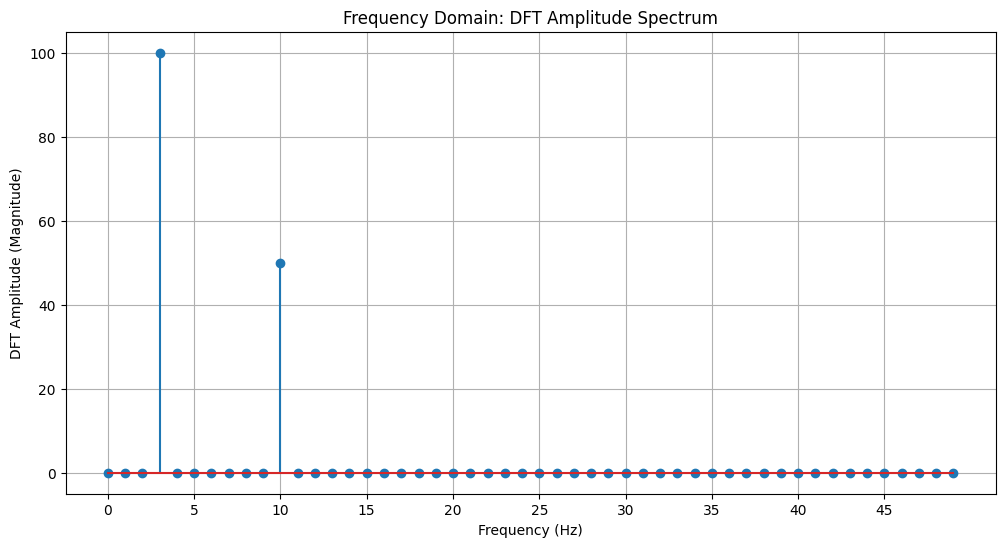

In [5]:
# --- 执行DFT ---
dft_result = simple_dft(signal)

# --- 分析并绘图 ---

# 1. 计算振幅
# DFT结果是复数，我们关心的是它的模（magnitude），也就是振幅
amplitudes = np.abs(dft_result)

# 2. 创建频率轴
# DFT的输出索引k需要转换成真正的频率(Hz)
# 频率k对应的真实频率 = k * (采样率 / 总样本数)
# 在本例中，采样率/总样本数 = 100/100 = 1，所以索引k的值恰好等于频率
frequency_axis = np.arange(N) * (sampling_rate / N)

# 3. 绘图 (只绘制我们关心的前半部分)
# 因为对称性，我们只需要看 0 到 N/2 的部分
N_half = N // 2
plt.figure(figsize=(12, 6))

# 使用火柴图 (stem plot) 更能体现离散频率的特点
plt.stem(frequency_axis[:N_half], amplitudes[:N_half])

plt.title("Frequency Domain: DFT Amplitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("DFT Amplitude (Magnitude)")
plt.xticks(np.arange(0, sampling_rate / 2, 5)) # 让x轴刻度更清晰
plt.grid(True)
plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def simple_idft(X):
    """
    一个简单、清晰的逆离散傅里叶变换实现。

    :param X: 1D numpy array of complex numbers, DFT的结果 (长度为 N)
    :return: 1D numpy array of complex numbers, 重构后的时域信号 (长度为 N)
    """
    N = len(X)
    x = np.zeros(N, dtype=np.complex128) # 创建一个复数数组来存储重构信号

    # 外层循环：遍历每一个我们想重构的“样本点 n”
    for n in range(N):

        current_sum = 0 + 0j

        # 内层循环：遍历每一个输入的“频率成分 k”
        for k in range(N):

            # 核心公式: X_k * e^(+i * 2π * k * n / N)

            # 区别 1: 指数中的符号是正号 (+)
            angle = 2 * np.pi * k * n / N
            synthesis_wave = np.exp(1j * angle)

            current_sum += X[k] * synthesis_wave

        # 区别 2: 将累加结果除以 N 进行归一化
        x[n] = current_sum / N

    return x



开始 '去程' 旅行: Signal -> DFT -> Frequency Domain
已到达频域！

开始 '返程' 旅行: Frequency Domain -> IDFT -> Signal
已返回时域！

--- 数值验证 ---
原始信号前5个点:  [0.         0.96254788 1.68730562 2.02271011 1.95687946]
重构信号前5个点:  [-1.32113514e-14  9.62547881e-01  1.68730562e+00  2.02271011e+00
  1.95687946e+00]

原始信号与重构信号之间的最大绝对误差: 7.382983113757291e-14


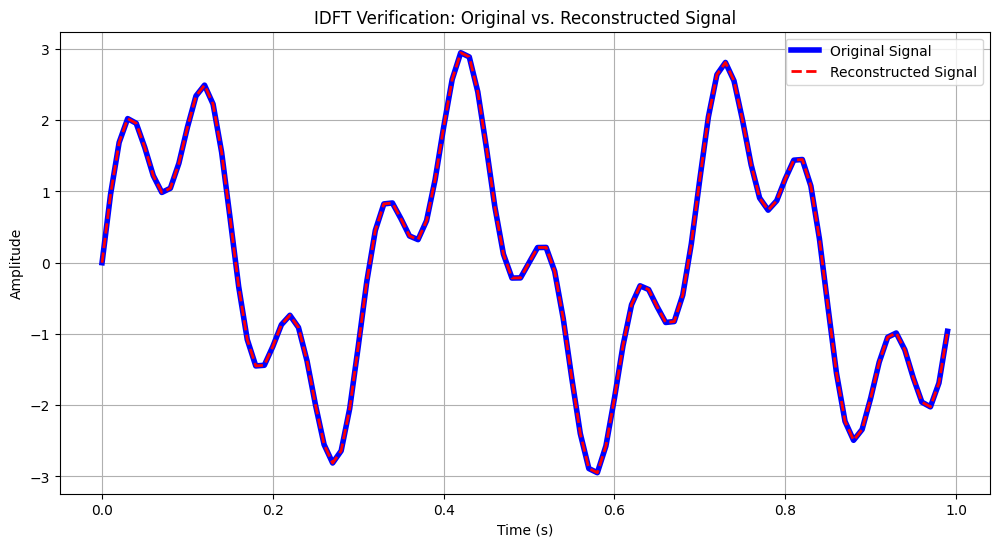

In [9]:
# --- 1. 出发：创建原始信号 (和上一章完全一样) ---
sampling_rate = 100
duration = 1
N = int(sampling_rate * duration)
t = np.linspace(0, duration, N, endpoint=False)

# 信号包含 3Hz 和 10Hz 两个成分
original_signal = (2 * np.sin(2 * np.pi * 3 * t)) + (1 * np.sin(2 * np.pi * 10 * t))

# --- 2. 去程：执行DFT ---
print("开始 '去程' 旅行: Signal -> DFT -> Frequency Domain")
dft_result = simple_dft(original_signal)
print("已到达频域！")

# --- 3. 返程：执行IDFT ---
print("\n开始 '返程' 旅行: Frequency Domain -> IDFT -> Signal")
reconstructed_signal = simple_idft(dft_result)
print("已返回时域！")


# --- 4. 抵达验证 ---
# IDFT的输出是复数，但由于原始信号是实数，其虚部应该非常接近于0
# 我们关心的是它的实部
reconstructed_signal_real = reconstructed_signal.real

# **验证方法一：数值对比**
print("\n--- 数值验证 ---")
print("原始信号前5个点: ", original_signal[:5])
print("重构信号前5个点: ", reconstructed_signal_real[:5])

# 计算最大误差
error = np.max(np.abs(original_signal - reconstructed_signal_real))
print(f"\n原始信号与重构信号之间的最大绝对误差: {error}")
# 这个误差会是一个非常非常小的数，比如 1e-14，这是由浮点数计算精度限制造成的

# **验证方法二：可视化对比**
plt.figure(figsize=(12, 6))
plt.plot(t, original_signal, label="Original Signal", color="blue", linewidth=4)
plt.plot(t, reconstructed_signal_real, label="Reconstructed Signal", color="red", linestyle="--", linewidth=2)
plt.title("IDFT Verification: Original vs. Reconstructed Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()
